# Big Mart Sales Prediction

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
#importing training data
df=pd.read_csv(r'C:\Users\dell\Downloads\ML\Big Mart Sales Prediction\train_v9rqX0R.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Preprocessing

In [3]:
df.shape

(8523, 12)

In [4]:
#features with null values
features_with_null=[feature for feature in df.columns if df[feature].isnull().sum()>=1]

for feature in features_with_null:
    print(f'{feature} contains {np.round(df[feature].isnull().mean(),4)*100}% missing values')

Item_Weight contains 17.169999999999998% missing values
Outlet_Size contains 28.28% missing values


Let's look for relationship between missing values and target variable

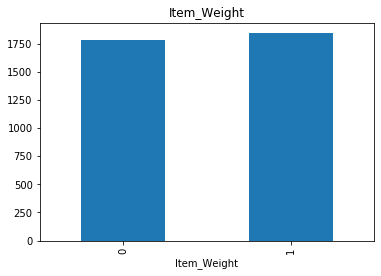

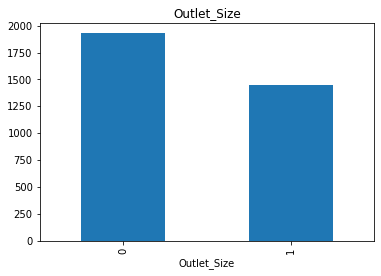

In [5]:
for feature in features_with_null:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Numerical Features

In [6]:
num_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(f'No. of numerical features: {len(num_features)}')

No. of numerical features: 5


In [7]:
df[num_features].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


Features involving year are called temporary features, beacause every year new data comes, that's why these variables changes

Text(0.5, 1.0, 'Sale Price vs Outlet Establishment Year')

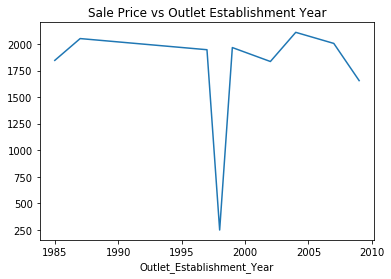

In [8]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.title('Sale Price vs Outlet Establishment Year')

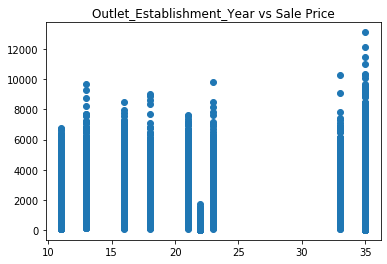

In [9]:
from datetime import datetime
data=df.copy()
data['Outlet_Establishment_Year']=datetime.now().year-data['Outlet_Establishment_Year']
plt.scatter(data['Outlet_Establishment_Year'],data['Item_Outlet_Sales'])
plt.title('Outlet_Establishment_Year vs Sale Price')
plt.show()

### Discrete Numerical Features

In [10]:
disc_features=[feature for feature in num_features if (len(df[feature].unique())<25) & (feature!='Outlet_Establishment_Year')]
disc_features

[]

### Continous Features

In [11]:
cont_features=[feature for feature in num_features if (feature not in disc_features) & (feature!='Outlet_Establishment_Year')]
cont_features

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [12]:
df[cont_features].head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


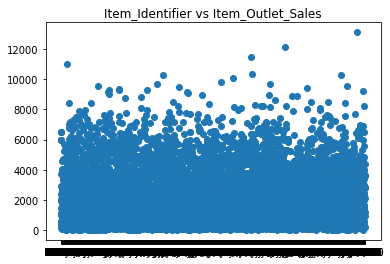

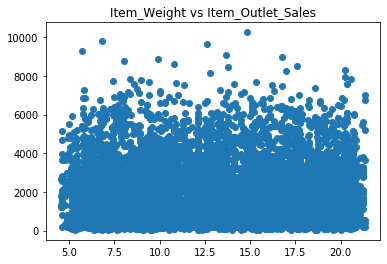

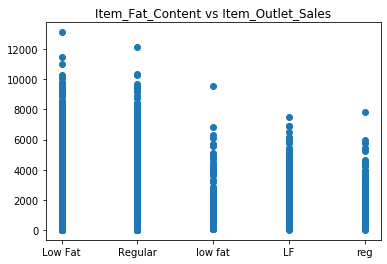

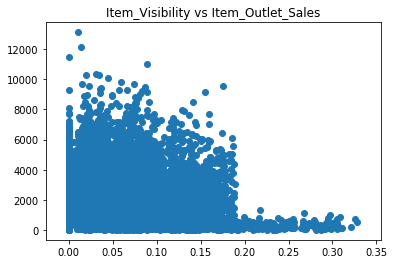

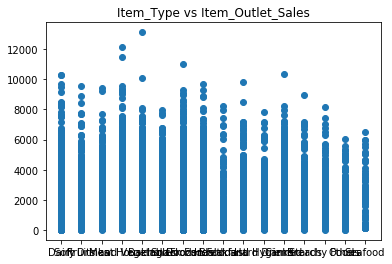

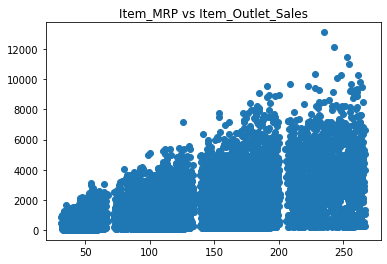

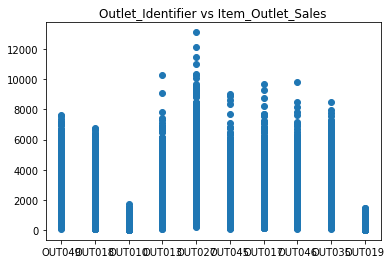

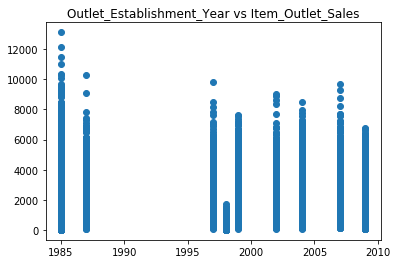

TypeError: nan is not a string

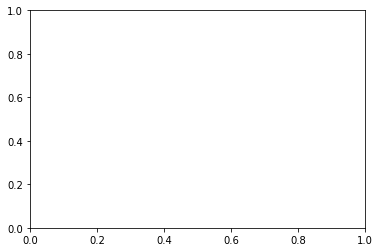

In [13]:
for feature in df.columns:
    plt.scatter(df[feature],df['Item_Outlet_Sales'])
    plt.title(f'{feature} vs Item_Outlet_Sales')
    plt.show()

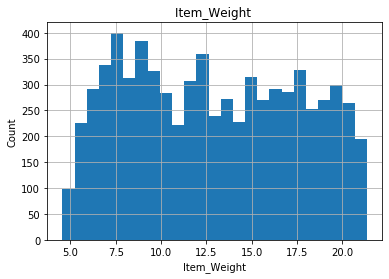

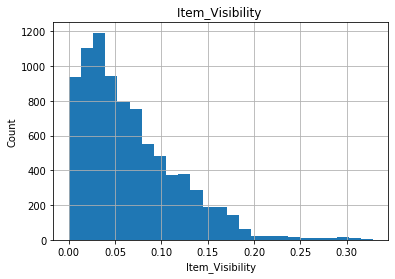

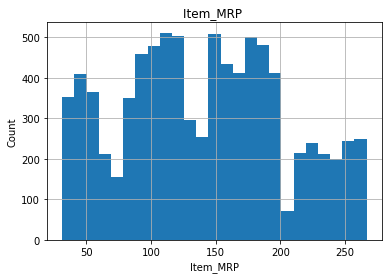

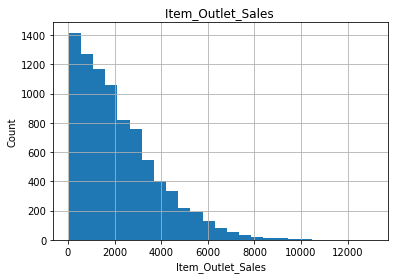

In [61]:
for feature in cont_features:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} ')
    plt.show()

In [62]:
df.skew(axis=0)

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Let's do Log Normal Transformation on Item_Visibility, Item_Outlet_Sales as their skewness is high

### Log Normal Transformation

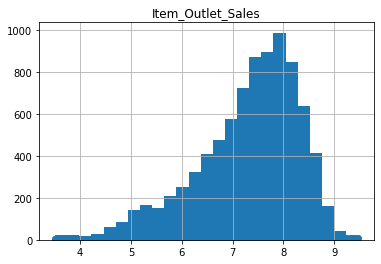

In [63]:
for feature in ['Item_Visibility', 'Item_Outlet_Sales']:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['Item_Outlet_Sales'])
        data[feature].hist(bins=25)
        plt.title(feature)
        plt.show()
                                       

### Outliers

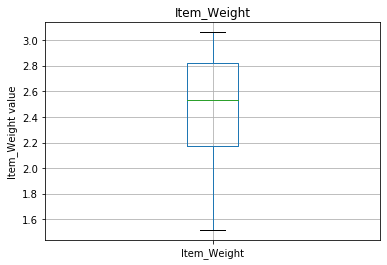

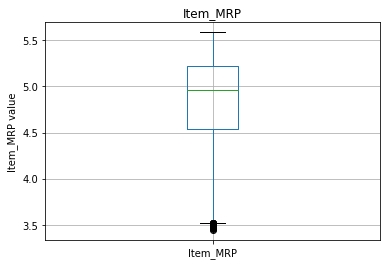

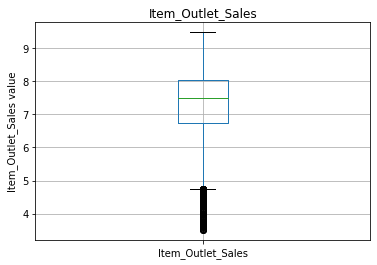

In [64]:
for feature in cont_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.ylabel(f'{feature} value')
        plt.show()

### Categorical Features

In [65]:
cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']
cat_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

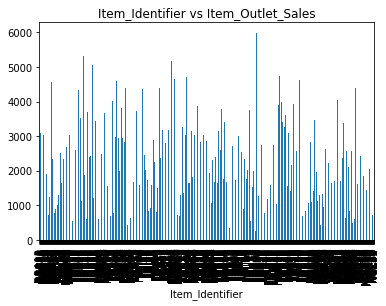

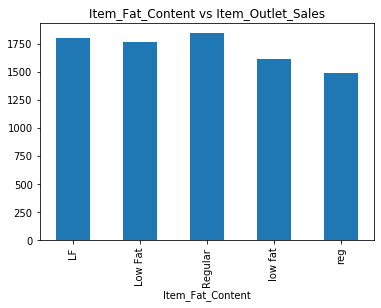

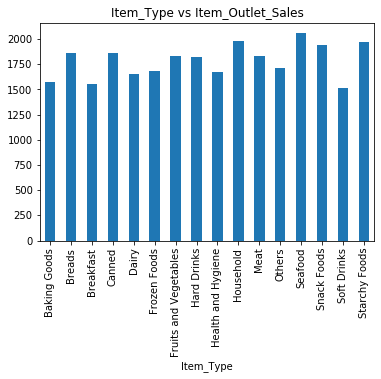

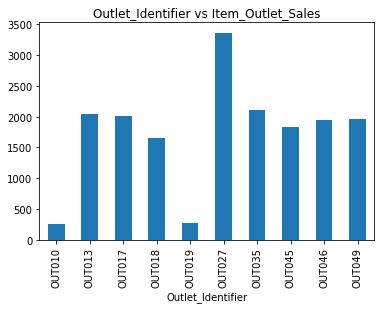

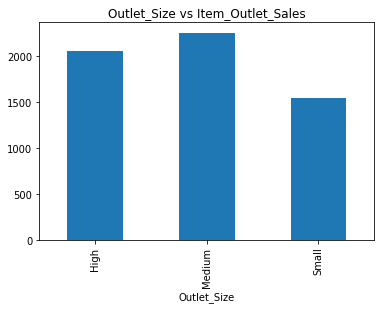

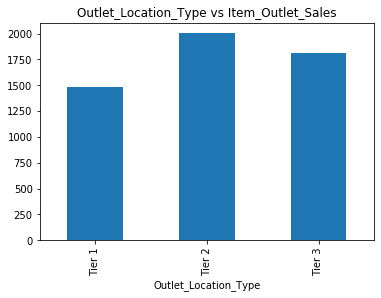

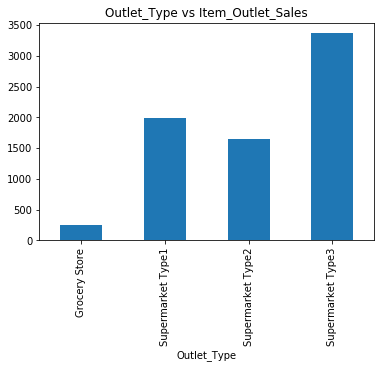

In [66]:
for feature in cat_features:
    df.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.title(f'{feature} vs Item_Outlet_Sales')
    plt.show()

## Feature Engineering

In [67]:
#let us handle missing values first
#replacing nan values with median as data has outliers
#first handling missing values for numerical features
for feature in num_features:
    if df[feature].isnull().sum()>=1:
        df[feature].fillna(df[feature].median(),inplace=True)

In [68]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [69]:
df['Outlet_Size'].isnull().sum()

2410

In [70]:
#deal with missing values of Outlet_Size
#using random sample imputer
random_sample=df['Outlet_Size'].dropna().sample(df['Outlet_Size'].isnull().sum(),random_state=0)
df['Outlet_Size_Random']=df['Outlet_Size']
random_sample.index=df[df['Outlet_Size'].isnull()].index
df.loc[df['Outlet_Size'].isnull(),'Outlet_Size_Random']=random_sample

In [71]:
#handlng categories in Item_fat_content
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [72]:
for i in range(df['Item_Fat_Content'].shape[0]):
    if df['Item_Fat_Content'][i]=='low fat':
        df['Item_Fat_Content'][i]='Low Fat'
    elif df['Item_Fat_Content'][i]=='LF':
        df['Item_Fat_Content'][i]='Low Fat'
    elif df['Item_Fat_Content'][i]=='reg':
        df['Item_Fat_Content'][i]='Regular'

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [73]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [74]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Size_Random              0
dtype: int64

In [75]:
df.drop('Outlet_Size',axis=1,inplace=True)

In [76]:
df['Outlet_Establishment_Year']=datetime.now().year - df['Outlet_Establishment_Year']

In [77]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,21,Tier 1,Supermarket Type1,3735.1380,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,11,Tier 3,Supermarket Type2,443.4228,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,21,Tier 1,Supermarket Type1,2097.2700,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,22,Tier 3,Grocery Store,732.3800,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,33,Tier 3,Supermarket Type1,994.7052,High


In [78]:
cat_features.remove('Outlet_Size')
cat_features.append('Outlet_Size_Random')

In [79]:
for feature in cat_features:
    print(f'{feature} has {len(df[feature].unique())} categories')

Item_Identifier has 1559 categories
Item_Fat_Content has 2 categories
Item_Type has 16 categories
Outlet_Identifier has 10 categories
Outlet_Location_Type has 3 categories
Outlet_Type has 4 categories
Outlet_Size_Random has 3 categories


### Ordinal Variables

In [80]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Outlet_Size_Random'],
      dtype='object')

We can see that Outlet_Size are ordinal variables. These have to be converted to numerical ones using label encoding:

In [81]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,21,Tier 1,Supermarket Type1,3735.1380,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,11,Tier 3,Supermarket Type2,443.4228,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,21,Tier 1,Supermarket Type1,2097.2700,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,22,Tier 3,Grocery Store,732.3800,Small
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,33,Tier 3,Supermarket Type1,994.7052,High


In [82]:
df['Outlet_Size_Random'].value_counts()

Medium    3873
Small     3342
High      1308
Name: Outlet_Size_Random, dtype: int64

In [83]:
for i in range(df.shape[0]):
    if df['Outlet_Size_Random'][i]=='Medium':
        df['Outlet_Size_Random'][i]=1
    elif df['Outlet_Size_Random'][i]=='Small':
        df['Outlet_Size_Random'][i]=0
    elif df['Outlet_Size_Random'][i]=='High':
        df['Outlet_Size_Random'][i]=2 

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [84]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,21,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,11,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,21,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,22,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,33,Tier 3,Supermarket Type1,994.7052,2


In [85]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

Features such as Item_Type, Outlet_Location_Type, Outlet_Type,Item_Fat_Content are nominal categorical variables

In [86]:
for feature in ['Item_Type', 'Outlet_Location_Type', 'Outlet_Type','Item_Fat_Content']:
    print(df[feature].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [87]:
item_type_dummy=pd.get_dummies(df['Item_Type'],drop_first=True)
outlet_location_type_dummy=pd.get_dummies(df['Outlet_Location_Type'],drop_first=True)
outlet_type_dummy=pd.get_dummies(df['Outlet_Type'],drop_first=True)
fat_content_dummy=pd.get_dummies(df['Item_Fat_Content'],drop_first=True)
df=pd.concat([df,item_type_dummy,outlet_location_type_dummy,outlet_type_dummy,fat_content_dummy],axis=1)

In [88]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Random,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular
0,9.30,Low Fat,0.016047,Dairy,249.8092,21,Tier 1,Supermarket Type1,3735.1380,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.92,Regular,0.019278,Soft Drinks,48.2692,11,Tier 3,Supermarket Type2,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,17.50,Low Fat,0.016760,Meat,141.6180,21,Tier 1,Supermarket Type1,2097.2700,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,22,Tier 3,Grocery Store,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,8.93,Low Fat,0.000000,Household,53.8614,33,Tier 3,Supermarket Type1,994.7052,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [89]:
df.drop(['Item_Type','Outlet_Location_Type','Outlet_Type','Item_Fat_Content'],axis=1,inplace=True)

In [90]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Size_Random,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular
0,9.30,0.016047,249.8092,21,3735.1380,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.92,0.019278,48.2692,11,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
2,17.50,0.016760,141.6180,21,2097.2700,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,19.20,0.000000,182.0950,22,732.3800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,8.93,0.000000,53.8614,33,994.7052,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [91]:
feature_scale=[feature for feature in df.columns if feature not in ['Item_Outlet_Sales']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
data=pd.concat([df['Item_Outlet_Sales'],pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [93]:
data.head()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Random,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular
0,3735.1380,-0.831187,-0.970732,1.747454,-0.139541,0.341404,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,-0.738147
1,443.4228,-1.630810,-0.908111,-1.489023,-1.334103,0.341404,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-0.696678,1.242650,-1.375891,2.860816,-0.351028,1.354743
2,2097.2700,1.108727,-0.956917,0.010040,-0.139541,0.341404,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,-0.738147
3,732.3800,1.510904,-1.281758,0.660050,-0.020085,-1.089169,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,1.354743
4,994.7052,-0.918719,-1.281758,-1.399220,1.293934,1.771977,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-0.738147


## Feature Selection


### 1. Feature importance using Random Forest Regressor

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('Item_Outlet_Sales',axis=1),
                                               data[['Item_Outlet_Sales']],
                                               test_size=0.2,
                                               random_state=0)

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [97]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':[2,5,10,15,100],
             'min_samples_leaf':[1,2,5,10]}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [99]:
rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter=10, 
                             cv=5, 
                             verbose=2, 
                             random_state=42, 
                             n_jobs=1)

In [100]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  11.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  16.1s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   9.5s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   9.7s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  10.8s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  10.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=  10.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=  17.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  27.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  28.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  25.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  26.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  27.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  26.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  25.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  25.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  26.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  23.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.4s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.1s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.9s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.0s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   8.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   4.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   6.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  35.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  34.7s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  33.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  33.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  33.2s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.7min finished
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [101]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [103]:
trainedforest=RandomForestRegressor(n_estimators= 300,
 min_samples_split= 100,
 min_samples_leaf= 5,
 max_features= 'auto',
 max_depth= 15)
trainedforest.fit(X_train,y_train)
predictions_trained=trainedforest.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
print(mse(y_test,predictions_trained))


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1197854.3605334586


In [104]:
mse(y_train,trainedforest.predict(X_train))

1023356.433817471

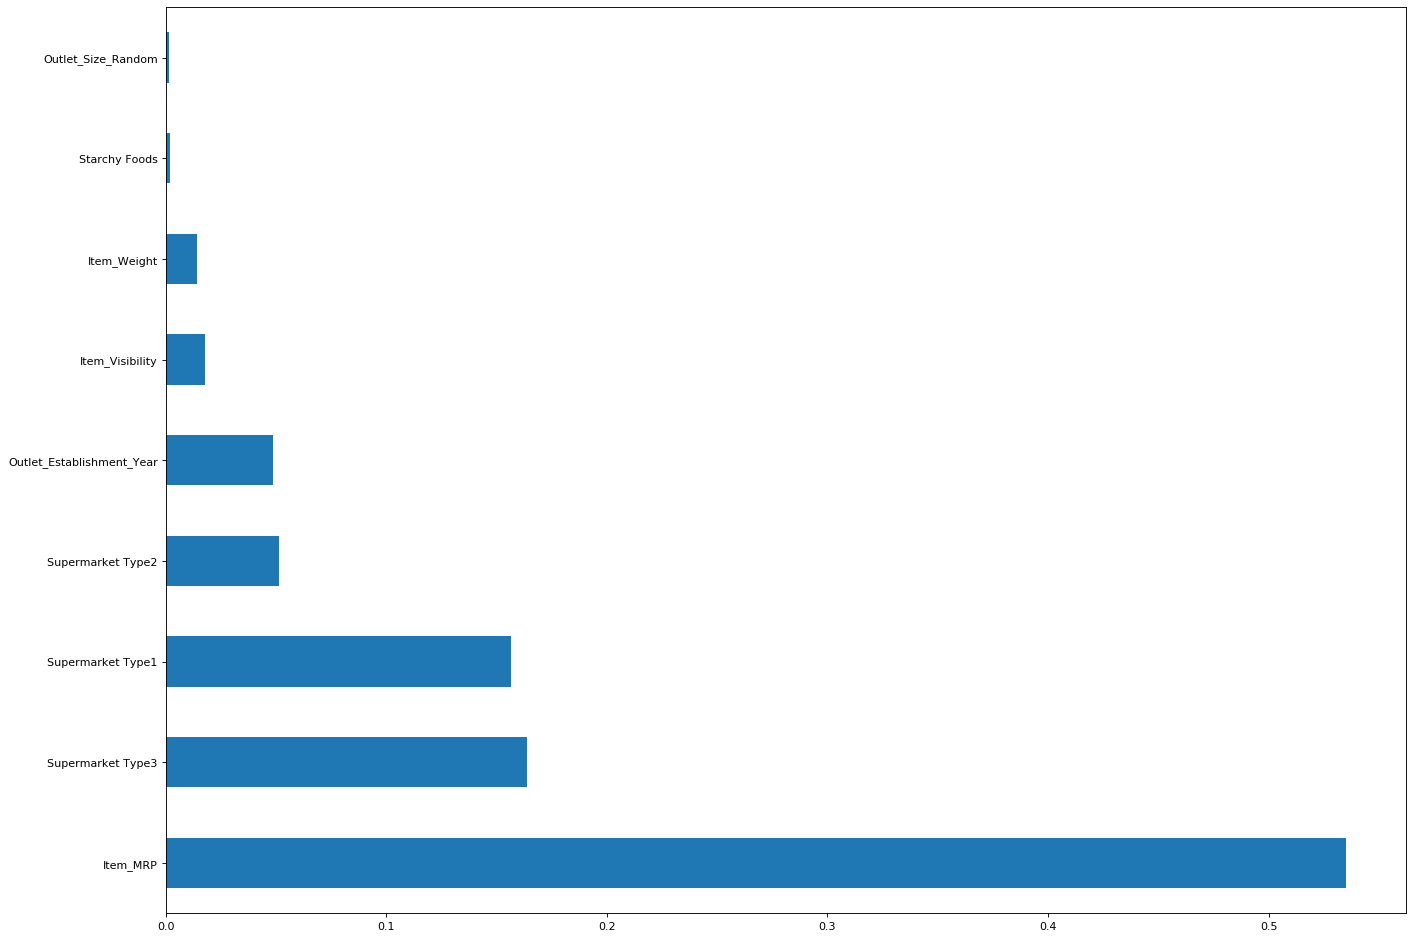

In [105]:
#feature importance plot
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
feat_importance=pd.Series(trainedforest.feature_importances_, index=X_train.columns)
feat_importance.nlargest(9).plot(kind='barh')

In [106]:
#taking these top 9 features as X_train
X=data[['Item_MRP','Supermarket Type3','Item_Visibility','Supermarket Type1',
              'Item_Weight','Outlet_Establishment_Year','Supermarket Type2']]

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               data[['Item_Outlet_Sales']],
                                               test_size=0.2,
                                               random_state=0)

In [109]:
trainedforest=RandomForestRegressor(n_estimators= 300,
 min_samples_split= 100,
 min_samples_leaf= 5,
 max_features= 'auto',
 max_depth= 15).fit(X_train,y_train)
predictions_trained=trainedforest.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
print(mse(y_test,predictions_trained))

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


1198351.6004835858


### 2. Backward Elimination

In [110]:
import statsmodels.api as sm
data.head()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Random,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular
0,3735.1380,-0.831187,-0.970732,1.747454,-0.139541,0.341404,-0.174193,-0.114346,-0.287094,3.390733,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,-0.738147
1,443.4228,-1.630810,-0.908111,-1.489023,-1.334103,0.341404,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935,-0.696678,1.242650,-1.375891,2.860816,-0.351028,1.354743
2,2097.2700,1.108727,-0.956917,0.010040,-0.139541,0.341404,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,-0.738147
3,732.3800,1.510904,-1.281758,0.660050,-0.020085,-1.089169,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,1.354743
4,994.7052,-0.918719,-1.281758,-1.399220,1.293934,1.771977,-0.174193,-0.114346,-0.287094,-0.294922,-0.334137,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-0.738147


In [111]:
data.shape

(8523, 27)

In [181]:
X=data.drop('Item_Outlet_Sales',axis=1).values
y=data['Item_Outlet_Sales'].values
x_opt=X[:,[2,22,23,24]]

In [182]:
regressor_ols=sm.OLS(endog=y, exog=x_opt).fit()

In [183]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.213
Model:                            OLS   Adj. R-squared (uncentered):              0.213
Method:                 Least Squares   F-statistic:                              577.7
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        12:54:39   Log-Likelihood:                         -78628.
No. Observations:                8523   AIC:                                  1.573e+05
Df Residuals:                    8519   BIC:                                  1.573e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           969.0441     26.613     36.412      0.000     916.876    1021.213
x2           933.1123     38.800     24.049      0.000     857.055    1009.169
x3           509.0178     34.233     14.869      0.000     441.913     576.123
x4          1050.6528     34.276     30.652      0.000     983.463    1117.843
==============================================================================
Omnibus:                      960.815   Durbin-Watson:                   0.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.652
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       5.163   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
rf=RandomForestRegressor()

n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features=['auto','sqrt']

max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [185]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':[2,5,10,15,100],
             'min_samples_leaf':[1,2,5,10]}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [186]:
rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter=10, 
                             cv=5, 
                             verbose=2, 
                             random_state=42, 
                             n_jobs=1)

In [187]:
X_train,X_test,y_train,y_test=train_test_split(x_opt,y,test_size=0.2,random_state=0)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [188]:
predictions=rf_random.predict(X_test)

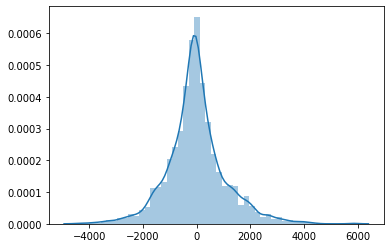

In [189]:
sns.distplot(y_test-predictions)

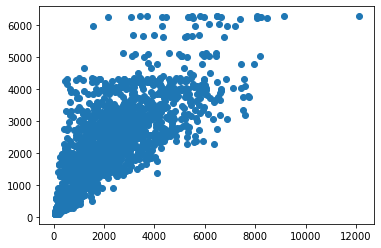

In [190]:
plt.scatter(y_test,predictions)

In [191]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [192]:
regressor=RandomForestRegressor(n_estimators=300, min_samples_split=100,min_samples_leaf=5, max_features='auto',max_depth=15,n_jobs=-1)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [193]:
y_pred=regressor.predict(X_test)

In [194]:
mse(y_test,y_pred)

1193862.4405640499

In [195]:
mse(y_train,regressor.predict(X_train))

1063240.904969341

### XGBoost Regressor

In [196]:
import xgboost
from xgboost import XGBRegressor
xg=XGBRegressor()

In [197]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]

learning_rate=[x for x in np.linspace(start=0.01,stop=0.1,num=10)]

early_stopping_rounds=5

In [198]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={'n_estimators':n_estimators,
             'learning_rate':learning_rate
             }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': [0.01, 0.020000000000000004, 0.030000000000000006, 0.04000000000000001, 0.05000000000000001, 0.06000000000000001, 0.07, 0.08, 0.09000000000000001, 0.1]}


In [199]:
xg_random=RandomizedSearchCV(estimator=xg,
                             param_distributions=random_grid,
                             scoring='neg_mean_squared_error', 
                             n_iter=10, 
                             cv=5, 
                             verbose=2, 
                             random_state=42, 
                             n_jobs=1)

In [200]:
xg_random.fit(X_train,y_train,early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, learning_rate=0.04000000000000001 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, learning_rate=0.04000000000000001, total=   0.7s
[CV] n_estimators=900, learning_rate=0.04000000000000001 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=900, learning_rate=0.04000000000000001, total=   0.5s
[CV] n_estimators=900, learning_rate=0.04000000000000001 .............
[CV]  n_estimators=900, learning_rate=0.04000000000000001, total=   0.4s
[CV] n_estimators=900, learning_rate=0.04000000000000001 .............
[CV]  n_estimators=900, learning_rate=0.04000000000000001, total=   0.4s
[CV] n_estimators=900, learning_rate=0.04000000000000001 .............
[CV]  n_estimators=900, learning_rate=0.04000000000000001, total=   0.4s
[CV] n_estimators=1200, learning_rate=0.04000000000000001 ............
[CV]  n_estimators=1200, learning_rate=0.04000000000000001, total=   0.4s
[CV] n_estimators=1200, learning_rate=0.04000000000000001 ............
[CV]  n_estimators=1200, learning_rate=0.04000000000000001, total=   0.4s
[CV] n_estimators=1200, learning_rate=0.04000000000000001 ............
[CV]  n_estimators=1200, learning_rate=0.04000000000000001, total=   0.4s
[CV] n_estimators=1200, learning_rate=0.04000000000000001 ..

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   param_distributions={'learning_rate': [0.01,
                                                          0.020000000000000004,
                                              

In [201]:
xg_random.best_params_

{'n_estimators': 300, 'learning_rate': 0.030000000000000006}

In [202]:
xgboost=XGBRegressor(n_estimators=300, learning_rate=0.03000000000000006)
xgboost.fit(X_train,y_train,early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03000000000000006, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [203]:
mse(y_test,xgboost.predict(X_test))

1214902.3442319334

In [204]:
mse(y_train,xgboost.predict(X_train))

1036442.9006517249

In [231]:
#As there has been some improvement over the feature importance method, let's make predictions on testing dataset.
df_test=pd.read_csv(r'C:\Users\dell\Downloads\ML\Big Mart Sales Prediction\test_AbJTz2l.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [232]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [233]:
df_test.shape

(5681, 11)

In [234]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].median(),inplace=True)
random_sample=df_test['Outlet_Size'].dropna().sample(df_test['Outlet_Size'].isnull().sum(),random_state=0)
df_test['Outlet_Size_Random']=df_test['Outlet_Size']
random_sample.index=df_test[df_test['Outlet_Size'].isnull()].index
df_test.loc[df_test['Outlet_Size'].isnull(),'Outlet_Size_Random']=random_sample

In [235]:
df_test.drop('Outlet_Size',axis=1,inplace=True)

In [236]:
df_test['Outlet_Establishment_Year']=datetime.now().year - df_test['Outlet_Establishment_Year']

In [237]:
for i in range(df_test.shape[0]):
    if df_test['Outlet_Size_Random'][i]=='Medium':
        df_test['Outlet_Size_Random'][i]=1
    elif df_test['Outlet_Size_Random'][i]=='Small':
        df_test['Outlet_Size_Random'][i]=0
    elif df_test['Outlet_Size_Random'][i]=='High':
        df_test['Outlet_Size_Random'][i]=2 

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [239]:
for i in range(df_test['Item_Fat_Content'].shape[0]):
    if df_test['Item_Fat_Content'][i]=='low fat':
        df_test['Item_Fat_Content'][i]='Low Fat'
    elif df_test['Item_Fat_Content'][i]=='LF':
        df_test['Item_Fat_Content'][i]='Low Fat'
    elif df_test['Item_Fat_Content'][i]=='reg':
        df_test['Item_Fat_Content'][i]='Regular'

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
item_type_dummy_test=pd.get_dummies(df_test['Item_Type'],drop_first=True)
outlet_location_type_dummy_test=pd.get_dummies(df_test['Outlet_Location_Type'],drop_first=True)
outlet_type_dummy_test=pd.get_dummies(df_test['Outlet_Type'],drop_first=True)
fat_content_dummy_test=pd.get_dummies(df_test['Item_Fat_Content'],drop_first=True)
df_test=pd.concat([df_test,item_type_dummy_test,outlet_location_type_dummy_test,outlet_type_dummy_test,fat_content_dummy_test],axis=1)

In [241]:
df_test.drop(['Item_Type','Outlet_Location_Type','Outlet_Type','Item_Fat_Content'],axis=1,inplace=True)

In [242]:
feature_scale=[feature for feature in df_test.columns if feature not in ['Item_Identifier','Outlet_Identifier']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_test[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [243]:
data_test=pd.concat([df_test[['Item_Identifier','Outlet_Identifier']],pd.DataFrame(scaler.transform(df_test[feature_scale]), columns=feature_scale)],axis=1)

In [244]:
data_test.head()

,Item_Identifier,Outlet_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Random,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Regular
0,FDW58,OUT049,1.905090,-1.134077,-0.536555,-0.139891,0.337286,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,-0.240654,-0.141167,-0.066484,2.490031,-0.228116,-0.147521,-0.696584,-0.804750,0.726900,-0.349374,-0.351274,-0.740811
1,FDW14,OUT017,-1.027457,-0.531850,-0.868937,-1.095512,0.337286,-0.172954,-0.116445,-0.287959,3.393113,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,-0.240654,-0.141167,-0.066484,-0.401601,-0.228116,-0.147521,1.435578,-0.804750,0.726900,-0.349374,-0.351274,1.349873
2,NCN55,OUT010,0.456482,0.661316,1.629848,-0.020438,-1.102325,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,-0.240654,7.083797,-0.066484,-0.401601,-0.228116,-0.147521,-0.696584,1.242623,-1.375706,-0.349374,-0.351274,-0.740811
3,FDQ58,OUT017,-1.259469,-0.981416,0.226697,-1.095512,0.337286,-0.172954,-0.116445,-0.287959,-0.294715,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,-0.240654,-0.141167,-0.066484,2.490031,-0.228116,-0.147521,1.435578,-0.804750,0.726900,-0.349374,-0.351274,-0.740811
4,FDY38,OUT027,-0.038164,1.032540,1.508110,1.532446,0.337286,-0.172954,-0.116445,-0.287959,3.393113,-0.333952,-0.399234,-0.16355,-0.251516,-0.355685,-0.240654,-0.141167,-0.066484,-0.401601,-0.228116,-0.147521,-0.696584,1.242623,-1.375706,-0.349374,2.846782,1.349873


In [246]:
#taking all features for training the model
trainedforest.fit(data.drop('Item_Outlet_Sales',axis=1),data['Item_Outlet_Sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [248]:
predictions1=trainedforest.predict(data_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1))

In [252]:
submit1=data_test[['Item_Identifier','Outlet_Identifier']]
submit1=pd.concat([submit1,pd.Series(predictions1)],axis=1)
submit1.set_index('Item_Identifier',inplace=True)
submit1.columns=['Outlet_Identifier','Item_Outlet_Sales']
submit1.to_csv(r'C:\Users\dell\Downloads\submit4.csv')

In [148]:
#2. Using Bakward Elimination done before
#x_opt=X[:,[2,22,23,24]]
data.head()

,Item_Outlet_Sales,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size_Random,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,3735.1380,0.282525,0.0,0.048866,0.927507,0.416667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,443.4228,0.081274,1.0,0.058705,0.072068,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2097.2700,0.770765,0.0,0.051037,0.468288,0.416667,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,732.3800,0.871986,1.0,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,994.7052,0.260494,0.0,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [253]:
data.drop('Item_Outlet_Sales',axis=1).iloc[:,[2,22,23,24]].columns

Index(['Item_MRP', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [254]:
columns=['Item_MRP', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']
X=data_test[columns].values
X

array([[-0.53655526,  0.72689965, -0.34937375, -0.35127385],
       [-0.86893692,  0.72689965, -0.34937375, -0.35127385],
       [ 1.62984753, -1.37570571, -0.34937375, -0.35127385],
       ...,
       [-0.36048475,  0.72689965, -0.34937375, -0.35127385],
       [ 1.19084433,  0.72689965, -0.34937375, -0.35127385],
       [-0.99067406,  0.72689965, -0.34937375, -0.35127385]])

In [256]:
y_pred_test2=regressor.predict(X)

In [257]:
submit2=data_test[['Item_Identifier','Outlet_Identifier']]
submit2=pd.concat([submit2,pd.Series(y_pred_test2)],axis=1)
submit2.set_index('Item_Identifier',inplace=True)
submit2.columns=['Outlet_Identifier','Item_Outlet_Sales']
submit2.to_csv(r'C:\Users\dell\Downloads\submit5.csv')

In [259]:
#using feature selection from model
X=data[['Item_MRP','Supermarket Type3','Item_Visibility','Supermarket Type1',
              'Item_Weight','Outlet_Establishment_Year','Supermarket Type2']]
X_test=data_test[['Item_MRP','Supermarket Type3','Item_Visibility','Supermarket Type1',
              'Item_Weight','Outlet_Establishment_Year','Supermarket Type2']]
trainedforest.fit(X,data['Item_Outlet_Sales'])
y_pred_test3=trainedforest.predict(X_test)

In [260]:
submit3=data_test[['Item_Identifier','Outlet_Identifier']]
submit3=pd.concat([submit3,pd.Series(y_pred_test3)],axis=1)
submit3.set_index('Item_Identifier',inplace=True)
submit3.columns=['Outlet_Identifier','Item_Outlet_Sales']
submit3.to_csv(r'C:\Users\dell\Downloads\submit6.csv')

In [261]:
y_xgboost_pred_test=xgboost.predict(X)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3'] ['Item_MRP', 'Supermarket Type3', 'Item_Visibility', 'Supermarket Type1', 'Item_Weight', 'Outlet_Establishment_Year', 'Supermarket Type2']
expected f1, f2, f0, f3 in input data
training data did not have the following fields: Supermarket Type3, Item_Weight, Supermarket Type2, Item_Visibility, Item_MRP, Supermarket Type1, Outlet_Establishment_Year

In [153]:
submit=data_test[['Item_Identifier','Outlet_Identifier']]
submit.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [154]:
submit=pd.concat([submit,pd.Series(y_xgboost_pred_test)],axis=1)
submit.set_index('Item_Identifier',inplace=True)
submit.head()

,Outlet_Identifier,0
Item_Identifier,,
FDW58,OUT049,1579.636719
FDW14,OUT017,1350.923950
NCN55,OUT010,590.366028
FDQ58,OUT017,2325.325195
FDY38,OUT027,5968.861328


In [155]:
submit.columns=['Outlet_Identifier','Item_Outlet_Sales']
submit.head()

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1579.636719
FDW14,OUT017,1350.923950
NCN55,OUT010,590.366028
FDQ58,OUT017,2325.325195
FDY38,OUT027,5968.861328


In [156]:
submit.to_csv(r'C:\Users\dell\Downloads\\submit3.csv')